In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 13945 (delta 0), reused 1 (delta 0), pack-reused 13939
Receiving objects: 100% (13945/13945), 12.59 MiB | 11.32 MiB/s, done.
Resolving deltas: 100% (9505/9505), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-19 16:36:52--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  5.12MB/s    in 33s     

2020-07-19 16:37:26 (7.21 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

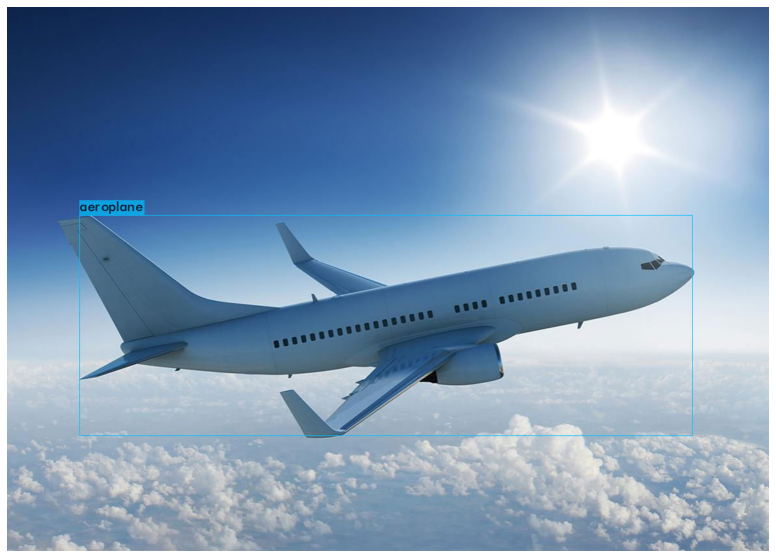

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'backup?.ipynb'			       Pothole-Kaggle
'Colab Notebooks'		       Pothole_random
'Combined_Format_(7.86GB)'	      'potholes (1)'
 darknet.py			       potholes5.jpg
 data				       potholes-cplx
'Detected Potholes'		       Pothole-Test
'Getting started.pdf'		       sample_data
 images				       SIH
 Labelr				       testimgs
 labels				       test.txt
'Minor Project - Pothole Detection'    Trained_Yolo_weights_pothole
'Modified threshold trained weights'   train.txt
 MP_PotholeDetectionNew.zip	      'Video Detection'
 obj.data			       yolo-pothole-test.cfg
 obj.names			       yolov3
 Pothole			       yolov3-old
 pothole1.jpg


In [ ]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/images/plane.jpg
imShow('predictions.jpg')

/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x

NameError: ignored

In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

backup		   obj.data   obj.zip		  yolov3_custom.cfg
generate_train.py  obj.names  yolov3_custom2.cfg


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/1.jpg          
  inflating: data/obj/1.txt          
  inflating: data/obj/10.jpg         
  inflating: data/obj/10.txt         
  inflating: data/obj/100.jpg        
  inflating: data/obj/100.txt        
  inflating: data/obj/101.jpg        
  inflating: data/obj/101.txt        
  inflating: data/obj/103.jpg        
  inflating: data/obj/103.txt        
  inflating: data/obj/104.jpg        
  inflating: data/obj/104.txt        
  inflating: data/obj/105.jpg        
  inflating: data/obj/105.txt        
  inflating: data/obj/106.jpg        
  inflating: data/obj/106.txt        
  inflating: data/obj/107.jpg        
  inflating: data/obj/107.txt        
  inflating: data/obj/108.jpg        
  inflating: data/obj/108.txt        
  inflating: data/obj/109.jpg        
  inflating: data/obj/109.txt        
  inflating: data/obj/11.jpg         
  inflating: data/obj/11.txt         
  inflating: data/obj/110.jpg        
  inflating: data/obj/110.txt

In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom2.cfg

In [ ]:
# to download to local machine (change its name to yolov3_custom.cfg once you download)
download('cfg/yolov3.cfg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

In [ ]:
!python generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-07-19 08:13:20--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  4.06MB/s    in 72s     

2020-07-19 08:14:33 (2.15 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000011, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000047, iou_loss = 0.000000, total_loss = 0.000047 
 total_bbox = 169908, rewritten_bbox = 0.000000 % 

 957: 0.883297, 1.145513 avg loss, 0.000839 rate, 14.498399 seconds, 61248 images, 10.798288 hours left
Loaded: 0.000063 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.694271, GIOU: 0.676676), Class: 0.992791, Obj: 0.138210, No Obj: 0.002435, .5R: 1.000000, .75R: 0.250000, count: 8, class_loss = 1.853535, iou_loss = 0.589860, total_loss = 2.443395 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.469417, GIOU: 0.371747), Class: 0.961927, Obj: 0.126769, No Obj: 0.000679, .5R: 0.500000, .75R: 0.000000, count: 4, class_loss = 1.102431, iou_loss = 1.399773, total_loss = 2.502204 
v3 (m

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 165272, rewritten_bbox = 0.000000 % 

 3926: 0.302007, 0.375571 avg loss, 0.000010 rate, 22.287915 seconds, 251264 images, 0.707751 hours left
Loaded: 0.000035 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.838969, GIOU: 0.834897), Class: 0.999471, Obj: 0.770927, No Obj: 0.003910, .5R: 1.000000, .75R: 0.857143, count: 7, class_loss = 0.291845, iou_loss = 0.144888, total_loss = 0.436734 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.762350, GIOU: 0.756535), Class: 0.999906, Obj: 0.843308, No Obj: 0.000604, .5R: 1.000000, .75R: 0.571429, count: 7, class_loss = 0.186824, iou_loss = 0.318155, total_loss = 0.504979 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.632798, GIOU: 0.617123), Class: 0.997402, Obj: 0.231567, No Obj: 0.000046, .5R: 0.666667, .75R: 0.333333, count: 3, class_loss = 0.613640, iou_loss = 0.282403, total_loss = 0.896043 
 tot

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

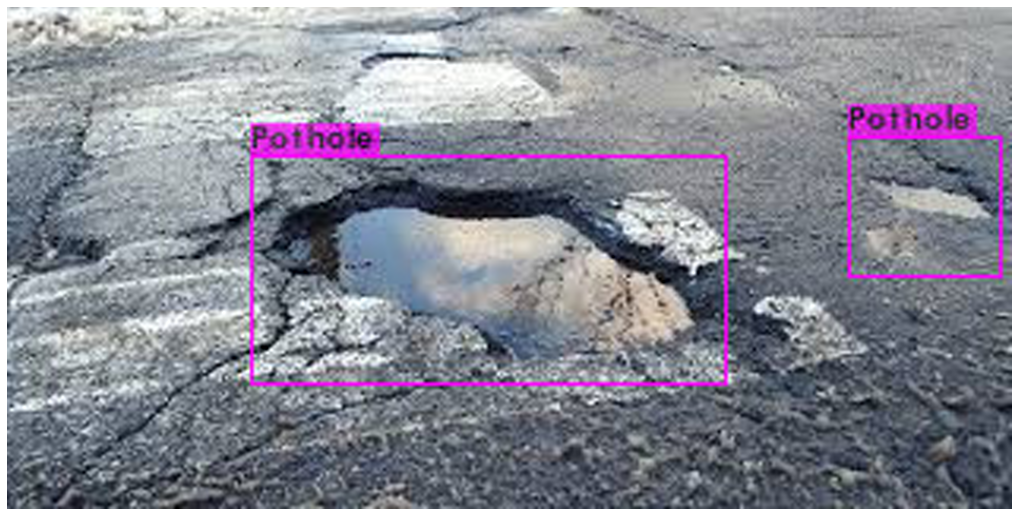

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_final.weights /mydrive/images/download.jpg -thresh 0.3
imShow('predictions.jpg')